<a href="https://colab.research.google.com/github/RijuKim/data_analysis/blob/main/social_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis with Twitter

In [1]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,193 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

### 드라이브에 마운트

In [13]:
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


### 트위터 개발자 계정 연결하기

In [14]:
!pip install git+https://github.com/tweepy/tweepy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-2jr8132g
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-2jr8132g
  Resolved https://github.com/tweepy/tweepy.git to commit 0cd96b1918e5e920eb9f8fe4ba303ab5ec899c65
  Preparing metadata (setup.py) ... done


In [15]:
import tweepy  #트위터 데이터 스크래핑 라이브러리 

In [16]:
# 트위터 앱의 Keys and Access Tokens 탭 참조 (자신의 설정 값을 넣어준다)

api_key = ''

api_secret_key = ''

In [17]:
# 1. 인증요청(1차) : 개인 앱 정보 
auth = tweepy.OAuthHandler(api_key, api_secret_key)

access_token = ''

access_token_secret = ''

In [18]:
# 2. access 토큰 요청(2차) - 인증요청 참조변수 이용
auth.set_access_token(access_token, access_token_secret)

In [19]:
# 3. twitter API 생성  
api = tweepy.API(auth)

In [21]:
keyword = "약 먹기"       # 자신이 검색하고 싶은 키워드 입력
until = "2023-01-13"      # 특정 일자 이전의 tweet만 검색. 날짜는 ‘YYYY-MM-DD’형태로 입력
items = 100               # 몇 개의 트윗을 검색할 것인지 입력


search = []             # Scraping 결과 저장할 리스트   
for status in tweepy.Cursor(api.search_tweets, q=keyword, until=until).items(items):
    search.append(status.text)

print(len(search)) # 결과물 길이 
print(search[0]) # 첫번째 text 보기 

100
아약먹기싫어


In [22]:
data = {}   # 전체 결과물 추가
i = 0       # 트윗 번호
for tweet in search:
    data['text'] = search[i]   # text키에 text문서 저장
    #print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

print(data)

{'text': 'RT @Hi_STTI: 헐 이분 썰? 감사인사? 되게 맛있네요\n\n그러게 한국인들 뭐만하면 다 먹네\n밥 - 먹음\n약 - 먹음\n음료 - 먹음\n그림 - 맛있음\n마음 - 먹기 달렸음\n안부인사 - 언제 한번 밥먹자\n할머니 - 굶으면 혼남\n비꼬기 - 그래서 밥…'}


In [23]:
# 전체 트윗을 tweet_data 텍스트 파일로 저장

import os

wfile = open("/gdrive/My Drive/tweet_data_약먹기.txt", mode='w')   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

for tweet in search:
    data['text'] = search[i]
    wfile.write(search[i]+'\n')  # 파일 출력
    i += 1

wfile.close()

In [24]:
# 파일에 scraping 해온 데이터가 잘 저장되었나 확인

file = open("/gdrive/My Drive/tweet_data_약먹기.txt", 'r')

uncleaned_text = file.readlines()
file.close()

print(uncleaned_text)

# 파일에 scraping 해온 데이터가 잘 저장되었나 확인

['아약먹기싫어\n', 'RT @aegi3526: 개 좆같은 새끼들아 니네는 평생 빵에서 살아라\n', '\n', '17살들이 한짓\n', '1. 13살 여자 후배 성폭행\n', '2. 여자 후배 조건만남 강요\n', '3. 조건만남 나온 남성 5명한테 약 1,000만원 갈취\n', '4. 돈 안주면 담뱃불로 지지기, 뜨거운…\n', 'RT @plz1am: 아픈 연시은 약 먹기 싫어하면 안수호가 따뜻한 물 머그컵에 담아서 약이랑 같이 대령해서 먹게 함. 자꾸 그러니까 연시은 짜증나서 안수호 알바 끝나고 오기 전에 먼저 자버렸음. \n', '시은씨. 약 먹고 자야지.\n', '알바 끝나고 온 안수호가…\n', 'RT @Hi_STTI: 헐 이분 썰? 감사인사? 되게 맛있네요\n', '\n', '그러게 한국인들 뭐만하면 다 먹네\n', '밥 - 먹음\n', '약 - 먹음\n', '음료 - 먹음\n', '그림 - 맛있음\n', '마음 - 먹기 달렸음\n', '안부인사 - 언제 한번 밥먹자\n', '할머니 - 굶으면 혼남\n', '비꼬기 - 그래서 밥…\n', '물없이 약삼키면 안좋음?\n', '내가 물을 일주일에 한 두 컵 마시는데 그럼 약을 매일 2번씩 먹기에는 턱없이 부족함\n', 'RT @Crg4mI: 손님 주문,하시겠습니까?\n', '\n', '네 식사는 여기\n', '짭근친에 알오물 비벼먹기세트부터 \n', '에셈플에이드\n', '모범생런양아치동프라이\n', '황이사대딩동샐러드\n', '약혐관펜싱좀아포리조또.까지 주시고요\n', '\n', '후식은 인어런인간동아이스크림\n', '래번런슬데동프라페\n', '역아고붕어빵세트…\n', '손님 주문,하시겠습니까?\n', '\n', '네 식사는 여기\n', '짭근친에 알오물 비벼먹기세트부터 \n', '에셈플에이드\n', '모범생런양아치동프라이\n', '황이사대딩동샐러드\n', '약혐관펜싱좀아포리조또.까지 주시고요\n', '\n', '후식은 인어런인간동아이스크림\n', '래번런슬데동… https://t.co/9o5QRV

## 전처리, 그래프, 시각화에 필요한 라이브러리 import

In [25]:
import re #이모티콘 전처리
import networkx as nx #네트워크 분석 라이브러리

#matplotlib.font_manager._rebuild()
#plt.rc('font', family='NanumGothic')


### 파이썬 정규표현식을 이용해서 데이터 전처리

In [26]:
# 파이썬 정규표현식을 이용해서 데이터 전처리 (분석에 필요 없는 부분 삭제)

def clean_data(readData):
    text = re.sub('\n', '', readData)
    text = re.sub('RT', '', text) 
    text = re.sub('h\w{4}://\w\W.{13}', '', text)
    text = re.sub('&amp;', '', text)
    text = re.sub('@\w{2,15}', '', text)
    text = re.sub('^https', '', text)
    text = re.sub("[_《》….()!,'?&;*“”‘’=+-/#%]",'', text)
    text = re.sub('"','', text)
    text = re.sub('[0-9:]', '', text)
    
    text = text.lower() # 영어라서 소문자로 바꿔준다
    
    return text


In [27]:
# clean_data 함수 호출 전후 데이터 확인
print("전처리 이전 데이터 : ")
print(uncleaned_text[0])

print("전처리 이후 데이터 : ")
print(clean_data(uncleaned_text[0]))

# 데이터가 잘 정제 되었는지 확인해보자

전처리 이전 데이터 : 
아약먹기싫어

전처리 이후 데이터 : 
아약먹기싫어


#### 만약 트윗에 이모티콘이 있다면?

In [28]:
# 이모티콘을 제거하는 패턴 만들기
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# 이모티콘을 제거하는 함수 만들기
def remove_emoji(readData):
    text = re.sub(emoji_pattern, '', readData)
    return text


In [29]:
# remove_emoji 함수 호출 전후 데이터 확인

print("이모지 제거 이전 데이터 : ")
print(uncleaned_text[3])

print("이모지 제거 이후 데이터 : ")
print(uncleaned_text[3])

#데이터가 잘 정제 되었는지 확인해보자

이모지 제거 이전 데이터 : 
17살들이 한짓

이모지 제거 이후 데이터 : 
17살들이 한짓



### 반복문을 돌며 데이터 정제 함수 호출

In [30]:
cleaned_text = []

for i in range(len(uncleaned_text)):
  first_cleaned_text = clean_data(uncleaned_text[i])
  second_cleaned_text = remove_emoji(first_cleaned_text)
  
  # 한 트윗씩 거치며 새로운 리스트에 담는다.
  cleaned_text.append(second_cleaned_text)
  


print(cleaned_text)

['아약먹기싫어', '  개 좆같은 새끼들아 니네는 평생 빵에서 살아라', '', '살들이 한짓', ' 살 여자 후배 성폭행', ' 여자 후배 조건만남 강요', ' 조건만남 나온 남성 명한테 약 만원 갈취', ' 돈 안주면 담뱃불로 지지기 뜨거운', '  아픈 연시은 약 먹기 싫어하면 안수호가 따뜻한 물 머그컵에 담아서 약이랑 같이 대령해서 먹게 함 자꾸 그러니까 연시은 짜증나서 안수호 알바 끝나고 오기 전에 먼저 자버렸음 ', '시은씨 약 먹고 자야지', '알바 끝나고 온 안수호가', '  헐 이분 썰 감사인사 되게 맛있네요', '', '그러게 한국인들 뭐만하면 다 먹네', '밥  먹음', '약  먹음', '음료  먹음', '그림  맛있음', '마음  먹기 달렸음', '안부인사  언제 한번 밥먹자', '할머니  굶으면 혼남', '비꼬기  그래서 밥', '물없이 약삼키면 안좋음', '내가 물을 일주일에 한 두 컵 마시는데 그럼 약을 매일 번씩 먹기에는 턱없이 부족함', '  손님 주문하시겠습니까', '', '네 식사는 여기', '짭근친에 알오물 비벼먹기세트부터 ', '에셈플에이드', '모범생런양아치동프라이', '황이사대딩동샐러드', '약혐관펜싱좀아포리조또까지 주시고요', '', '후식은 인어런인간동아이스크림', '래번런슬데동프라페', '역아고붕어빵세트', '손님 주문하시겠습니까', '', '네 식사는 여기', '짭근친에 알오물 비벼먹기세트부터 ', '에셈플에이드', '모범생런양아치동프라이', '황이사대딩동샐러드', '약혐관펜싱좀아포리조또까지 주시고요', '', '후식은 인어런인간동아이스크림', '래번런슬데동 ', '오늘 한잔', '이건 진짜 샴페인 너무 써서 음료 섞어 먹기', '약 먹었는데 술먹기 과연 내일의 나 괜찮겠니 ', '약이 너무 작아서 물 먹으면 그 쓴 맛 다 남 차라리 큰 알약이 먹기 쉬운듯', ' 약 바른 곳에 안 닿게 목을 젖히고 마셨답니다 탄산이라 엄청 먹기 힘들었어요', '몸살기운 올라와서 이상한 자세로 잠깐 기절잠 잣어', '자야겟다온몸

### 토큰화를 위한 라이브러리 설치

In [31]:
# 영어 단어 토큰화 하기 위한 라이브러리
import nltk                     # natural language toolkit
nltk.download('all')

# 시간 1분~2분 정도 소요. 다 되면 True라고 뜬다.

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag # 품사판별
from nltk.corpus import stopwords

* 영어 문장에 대해서 토큰화를 수행하고, 이어서 품사 태깅을 수행
* PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NN은 명사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미

In [33]:
print(word_tokenize(cleaned_text[0]))

# 토큰화되었는지 확인

['아약먹기싫어']


In [34]:
all_nouns = []

for t in range(len(cleaned_text)): # 전체 트윗 개수만큼 반복
  x = word_tokenize(cleaned_text[t]) # 토큰화
  words = pos_tag(x) # 품사 태깅
  nouns = ""
  for word, pos in words:
    if pos in ['NN', 'NNP', 'NNS']: # 명사, 고유명사, 명사의 복수형 단어만 남긴다.
      param = word      
      nouns = nouns + param + " "
  all_nouns.append(nouns)

print(all_nouns)

['아약먹기싫어 ', '좆같은 새끼들아 니네는 평생 빵에서 살아라 ', '', '살들이 한짓 ', '여자 후배 성폭행 ', '후배 조건만남 강요 ', '나온 남성 명한테 약 만원 갈취 ', '안주면 담뱃불로 지지기 뜨거운 ', '연시은 약 먹기 싫어하면 안수호가 따뜻한 물 머그컵에 담아서 약이랑 같이 대령해서 먹게 함 자꾸 그러니까 연시은 짜증나서 안수호 알바 끝나고 오기 전에 먼저 자버렸음 ', '약 먹고 자야지 ', '끝나고 온 안수호가 ', '이분 썰 감사인사 되게 맛있네요 ', '', '한국인들 뭐만하면 다 먹네 ', '밥 먹음 ', '약 먹음 ', '음료 먹음 ', '그림 맛있음 ', '먹기 달렸음 ', '언제 한번 밥먹자 ', '굶으면 혼남 ', '그래서 밥 ', '약삼키면 안좋음 ', '물을 일주일에 한 두 컵 마시는데 그럼 약을 매일 번씩 먹기에는 턱없이 부족함 ', '손님 주문하시겠습니까 ', '', '식사는 여기 ', '알오물 비벼먹기세트부터 ', '에셈플에이드 ', '모범생런양아치동프라이 ', '황이사대딩동샐러드 ', '약혐관펜싱좀아포리조또까지 주시고요 ', '', '후식은 인어런인간동아이스크림 ', '래번런슬데동프라페 ', '역아고붕어빵세트 ', '손님 주문하시겠습니까 ', '', '식사는 여기 ', '알오물 비벼먹기세트부터 ', '에셈플에이드 ', '모범생런양아치동프라이 ', '황이사대딩동샐러드 ', '약혐관펜싱좀아포리조또까지 주시고요 ', '', '후식은 인어런인간동아이스크림 ', '래번런슬데동 ', '오늘 한잔 ', '진짜 샴페인 너무 써서 음료 섞어 먹기 ', '먹었는데 술먹기 과연 내일의 나 괜찮겠니 ', '너무 작아서 물 먹으면 그 쓴 맛 다 남 차라리 큰 알약이 먹기 쉬운듯 ', '바른 곳에 안 닿게 목을 젖히고 마셨답니다 탄산이라 엄청 먹기 힘들었어요 ', '올라와서 이상한 자세로 잠깐 기절잠 잣어 ', '자야겟다온몸이아프다 ', '비가 와서 이러네 ', '생리통도죽어미친놈아 ', '약먹기귀찮어ㅏ그냥잘게모륷다시발 ', '오늘

In [35]:
# 한 트윗 안에 중복 단어가 있는지 점검

file = open('dummy.txt', 'w')
for article in all_nouns:
  article = list(set(article.split())) # 단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
  print(article)
  for i in range(len(article)):
    file.write(article[i]+' ')
  file.write('\n')
file.close()
  

['아약먹기싫어']
['빵에서', '니네는', '좆같은', '살아라', '평생', '새끼들아']
[]
['살들이', '한짓']
['성폭행', '여자', '후배']
['강요', '조건만남', '후배']
['약', '남성', '만원', '명한테', '나온', '갈취']
['지지기', '안주면', '담뱃불로', '뜨거운']
['따뜻한', '담아서', '먼저', '자버렸음', '그러니까', '끝나고', '물', '약', '안수호가', '오기', '안수호', '약이랑', '함', '연시은', '같이', '짜증나서', '싫어하면', '전에', '대령해서', '먹기', '먹게', '알바', '머그컵에', '자꾸']
['자야지', '약', '먹고']
['온', '끝나고', '안수호가']
['썰', '되게', '이분', '감사인사', '맛있네요']
[]
['먹네', '한국인들', '뭐만하면', '다']
['밥', '먹음']
['약', '먹음']
['먹음', '음료']
['맛있음', '그림']
['달렸음', '먹기']
['언제', '한번', '밥먹자']
['혼남', '굶으면']
['밥', '그래서']
['안좋음', '약삼키면']
['턱없이', '번씩', '일주일에', '약을', '컵', '그럼', '매일', '물을', '마시는데', '먹기에는', '부족함', '두', '한']
['손님', '주문하시겠습니까']
[]
['식사는', '여기']
['비벼먹기세트부터', '알오물']
['에셈플에이드']
['모범생런양아치동프라이']
['황이사대딩동샐러드']
['약혐관펜싱좀아포리조또까지', '주시고요']
[]
['인어런인간동아이스크림', '후식은']
['래번런슬데동프라페']
['역아고붕어빵세트']
['손님', '주문하시겠습니까']
[]
['식사는', '여기']
['비벼먹기세트부터', '알오물']
['에셈플에이드']
['모범생런양아치동프라이']
['황이사대딩동샐러드']
['약혐관펜싱좀아포리조또까지', '주시고요']
[]
['인어런인간동아이스크림', '후식은']
['래번런슬데동']
['한잔',

#### 단어의 동시 출현 빈도 count

In [37]:
count = {}   # 동시출현 빈도가 저장될 딕셔너리

for article in open('dummy.txt'):
  article = list(set(article.split())) # 단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
  for i, a in enumerate(article): # 인덱스와 원소를 동시에 접근하면서 반복문 돌기
    for b in article[i:]:
      if a==b: 
        # 같은 단어의 경우는 세지 않으므로 그냥 지나간다
        # 여기에 작성
        continue
      if a>b: 
        a,b = b,a         # A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
        count[a, b] = count.get((a,b),0)+1   # 실제로 센다
        b,a = a,b
      elif a<b:
        count[a, b] = count.get((a,b),0)+1   # 실제로 센다
print(count)

{('니네는', '빵에서'): 1, ('니네는', '좆같은'): 1, ('니네는', '살아라'): 1, ('니네는', '평생'): 1, ('니네는', '새끼들아'): 1, ('빵에서', '좆같은'): 1, ('빵에서', '살아라'): 1, ('빵에서', '평생'): 1, ('빵에서', '새끼들아'): 1, ('살아라', '좆같은'): 1, ('좆같은', '평생'): 1, ('새끼들아', '좆같은'): 1, ('살아라', '평생'): 1, ('살아라', '새끼들아'): 1, ('새끼들아', '평생'): 1, ('살들이', '한짓'): 1, ('성폭행', '후배'): 1, ('여자', '후배'): 1, ('성폭행', '여자'): 1, ('강요', '조건만남'): 1, ('강요', '후배'): 1, ('조건만남', '후배'): 1, ('남성', '약'): 1, ('명한테', '약'): 1, ('만원', '약'): 1, ('나온', '약'): 1, ('갈취', '약'): 1, ('남성', '명한테'): 1, ('남성', '만원'): 1, ('나온', '남성'): 1, ('갈취', '남성'): 1, ('만원', '명한테'): 1, ('나온', '명한테'): 1, ('갈취', '명한테'): 1, ('나온', '만원'): 1, ('갈취', '만원'): 1, ('갈취', '나온'): 1, ('안주면', '지지기'): 1, ('담뱃불로', '지지기'): 1, ('뜨거운', '지지기'): 1, ('담뱃불로', '안주면'): 1, ('뜨거운', '안주면'): 1, ('담뱃불로', '뜨거운'): 1, ('담아서', '따뜻한'): 2, ('따뜻한', '먼저'): 2, ('따뜻한', '자버렸음'): 2, ('그러니까', '따뜻한'): 2, ('끝나고', '따뜻한'): 2, ('따뜻한', '물'): 2, ('따뜻한', '약'): 2, ('따뜻한', '안수호가'): 2, ('따뜻한', '오기'): 2, ('따뜻한', '안수호'): 2, ('따뜻한', '약이랑'): 2, ('따뜻한', '함

In [38]:
# 엣지 리스트를 그리기 위한 사전 작업

min_num = 3   # 동시 출현 빈도 카운팅 현황을 보고 알맞게 조정할 변수

file = open('edge_list.txt', 'w')
for key, value in count.items():
  if value >= min_num :
    print(key, value)
    string = str(key).strip("()")
    string = string.replace("'", "")
    string = string.replace(",","")
    newstr = string + "\n"
    file.write(newstr)
file.close()

# 직접 파일을 열어 비교해보자

('끝나고', '안수호가') 4
('먹기', '물') 3
('먹기', '약') 6
('먹기', '전에') 3
('되게', '썰') 46
('썰', '이분') 46
('감사인사', '썰') 46
('맛있네요', '썰') 46
('되게', '이분') 46
('감사인사', '되게') 46
('되게', '맛있네요') 46
('감사인사', '이분') 46
('맛있네요', '이분') 46
('감사인사', '맛있네요') 46
('뭐만하면', '한국인들') 46
('먹네', '뭐만하면') 46
('다', '뭐만하면') 46
('먹네', '한국인들') 46
('다', '한국인들') 46
('다', '먹네') 46
('먹음', '밥') 46
('먹음', '약') 46
('먹음', '음료') 46
('그림', '맛있음') 46
('달렸음', '먹기') 46
('언제', '한번') 46
('밥먹자', '언제') 46
('밥먹자', '한번') 46
('굶으면', '혼남') 46
('그래서', '밥') 46
('손실없이', '싶어서') 3
('먹이면', '싶어서') 3
('싶어서', '이렇게') 3
('싶어서', '약') 3
('싶어서', '열심히') 3
('끼적끼적', '싶어서') 3
('싶어서', '해봤어요') 3
('먹이는', '싶어서') 3
('방법을', '싶어서') 3
('싶어서', '약손실없이') 3
('싶어서', '있답니다') 3
('싶어서', '알려드리고') 3
('먹일수', '싶어서') 3
('먹이면', '손실없이') 3
('손실없이', '이렇게') 3
('손실없이', '약') 3
('손실없이', '열심히') 3
('끼적끼적', '손실없이') 3
('손실없이', '해봤어요') 3
('먹이는', '손실없이') 3
('방법을', '손실없이') 3
('손실없이', '약손실없이') 3
('손실없이', '있답니다') 3
('손실없이', '알려드리고') 3
('먹일수', '손실없이') 3
('먹이면', '이렇게') 3
('먹이면', '약') 3
('먹이면', '열심히') 3
('

In [41]:
# 한글 폰트가 깨지지 않도록 폰트 패밀리 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45149 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text

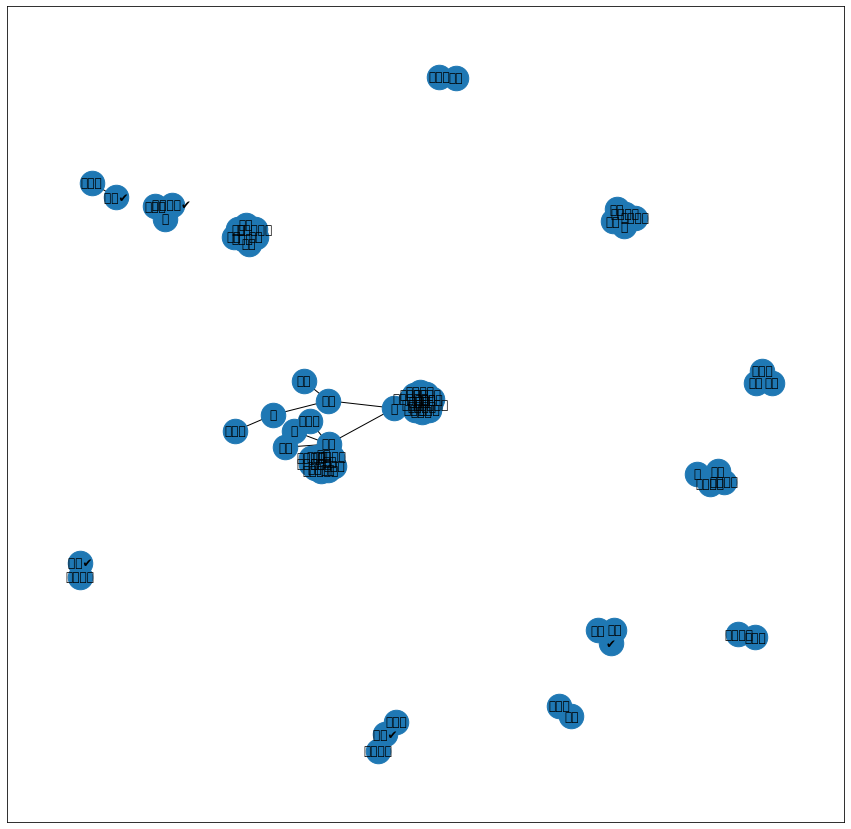

In [42]:
# 텍스트 파일 읽어서 엣지 리스트 그래프 그리기
G = nx.read_edgelist("edge_list.txt", create_using = nx.Graph())

# 그래프를 반복해서 그려보며 불필요한 노드 삭제
# (예시) G.remove_nodes_from(['thanks', 'i', '@', 'pm', 'n', 'sooo', 'truckers', 'caught', 'thousands', 'henry'])
G.remove_nodes_from(['microsofts','topacquisitions'])

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, node_size=600)

(-0.7222909546064994,
 0.8976609633028253,
 -1.0347458879466953,
 1.1933468943297765)

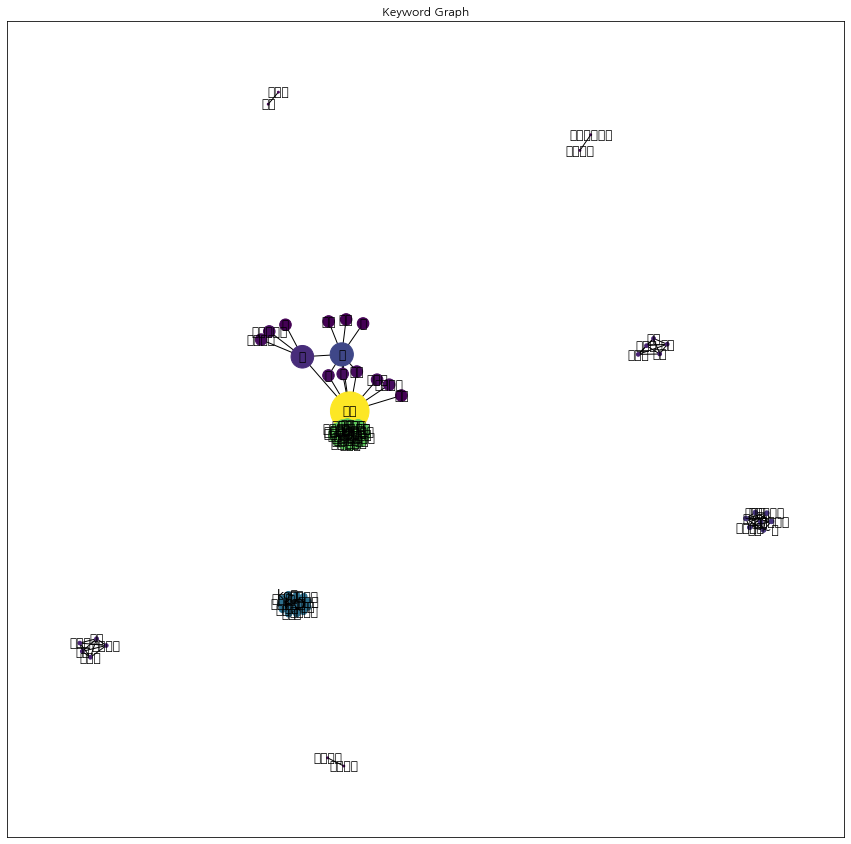

In [ ]:
# 그래프는 노드의 위치가 정해져있지 않다.
pos = nx.spring_layout(G) # 노드 그래프를 그려주는 레이아웃을 spring_layout으로 한다
# pos = nx.kamada_kawai_layout(G)
# pos = nx.fruchterman_reingold_layout(G)

# 매개 중심성 계산
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True) # 매개중심성
# 노드 색상 옵션
node_color = [20000.0 * G.degree(v) for v in G] # 연결정도에 따라 노드 색상이 달라지게
# 노드 사이즈 옵션
node_size =  [v * 10000 for v in betCent.values()] # 매개중심성에 따라 노드 크기가 달라지게

plt.figure(figsize=(15, 15)) # 그래프 사이즈
plt.title("Keyword Graph")
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size
                 )

plt.axis('on') # 가장자리 박스 만들기

In [ ]:
# 매개 중심성 높은 순서대로 보기

sorted(betCent, key=betCent.get, reverse=True)[:5] # 5개까지

['먹기', '약', '잘', '밥', '전에']

In [ ]:
# 노드별로 중심성 보기

# 매개 중심성 (betweenness centrality)
print(nx.betweeness_centrality(G).get(''))    # 그래프에 보이는 노드 바꿔보며 입력해보기

# 연결 중심성 (degree centrality)
print(nx.degree_centrality(G).get(''))         # 그래프에 보이는 노드 바꿔보며 입력해보기

# 근접 중심성 (closeness_centrality)
print(nx.closeness_centrality(G).get(''))      # 그래프에 보이는 노드 바꿔보며 입력해보기


AttributeError: ignored

# 나만의 키워드를 선정하고, 분석 결과 정리하기